In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Load the dataset

data = pd.read_csv('final.csv')

In [9]:
data.head()

,Unnamed: 0.1,Unnamed: 0,category,sub_category,crimeaditionalinfo
0,0,0,Online and Social Media Related Crime,Cyber Bullying Stalking Sexting,continue receive random call abusive message w...
1,1,1,Online Financial Fraud,Fraud CallVishing,fraudster continuously message ask pay money s...
2,2,2,Online Gambling Betting,Online Gambling Betting,act like police demand money add section text ...
3,3,3,Online and Social Media Related Crime,Online Job Fraud,apna job apply job interview telecalling resou...
4,4,4,Online Financial Fraud,Fraud CallVishing,receive call lady state send new phone vivo re...


In [10]:
data.shape

(124887, 5)

In [11]:
data.isna().sum()

Unnamed: 0.1             0
Unnamed: 0               0
category                 0
sub_category             0
crimeaditionalinfo    1610
dtype: int64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124887 entries, 0 to 124886
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Unnamed: 0.1        124887 non-null  int64 
 1   Unnamed: 0          124887 non-null  int64 
 2   category            124887 non-null  object
 3   sub_category        124887 non-null  object
 4   crimeaditionalinfo  123277 non-null  object
dtypes: int64(2), object(3)
memory usage: 4.8+ MB


In [13]:
data.nunique()

Unnamed: 0.1          124887
Unnamed: 0            124887
category                  16
sub_category              42
crimeaditionalinfo    104592
dtype: int64

In [14]:
data['category'].value_counts(normalize=True)*100

category
Online Financial Fraud                                  61.100034
Online and Social Media Related Crime                   13.033382
Any Other Cyber Crime                                   11.648130
Cyber Attack/ Dependent Crimes                           3.898724
RapeGang Rape RGRSexually Abusive Content                2.989903
Sexually Obscene material                                2.004212
Hacking  Damage to computercomputer system etc           1.843266
Sexually Explicit Act                                    1.671111
Cryptocurrency Crime                                     0.517268
Online Gambling  Betting                                 0.462818
Child Pornography CPChild Sexual Abuse Material CSAM     0.401963
Online Cyber Trafficking                                 0.195377
Cyber Terrorism                                          0.170554
Ransomware                                               0.059254
Crime Against Women & Children                           0.003203
R

In [15]:
category_counts = data['category'].value_counts().reset_index()
category_counts.columns = ['category', 'count']

C:\Users\chand\AppData\Local\Temp\ipykernel_25664\859908164.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=category_counts.index, x=category_counts.values, palette="viridis")


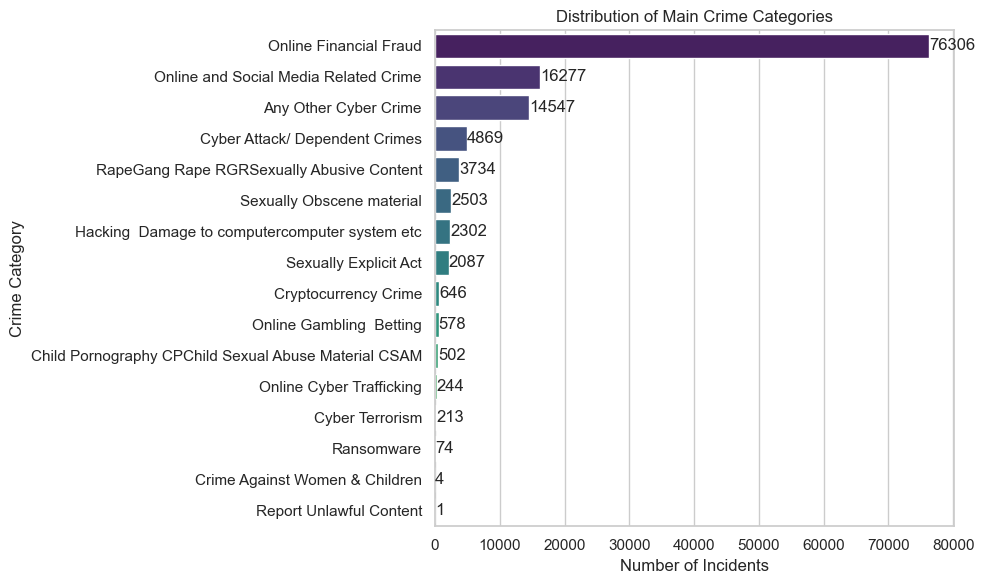

C:\Users\chand\AppData\Local\Temp\ipykernel_25664\859908164.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=sub_category_counts.index, x=sub_category_counts.values, palette="viridis")


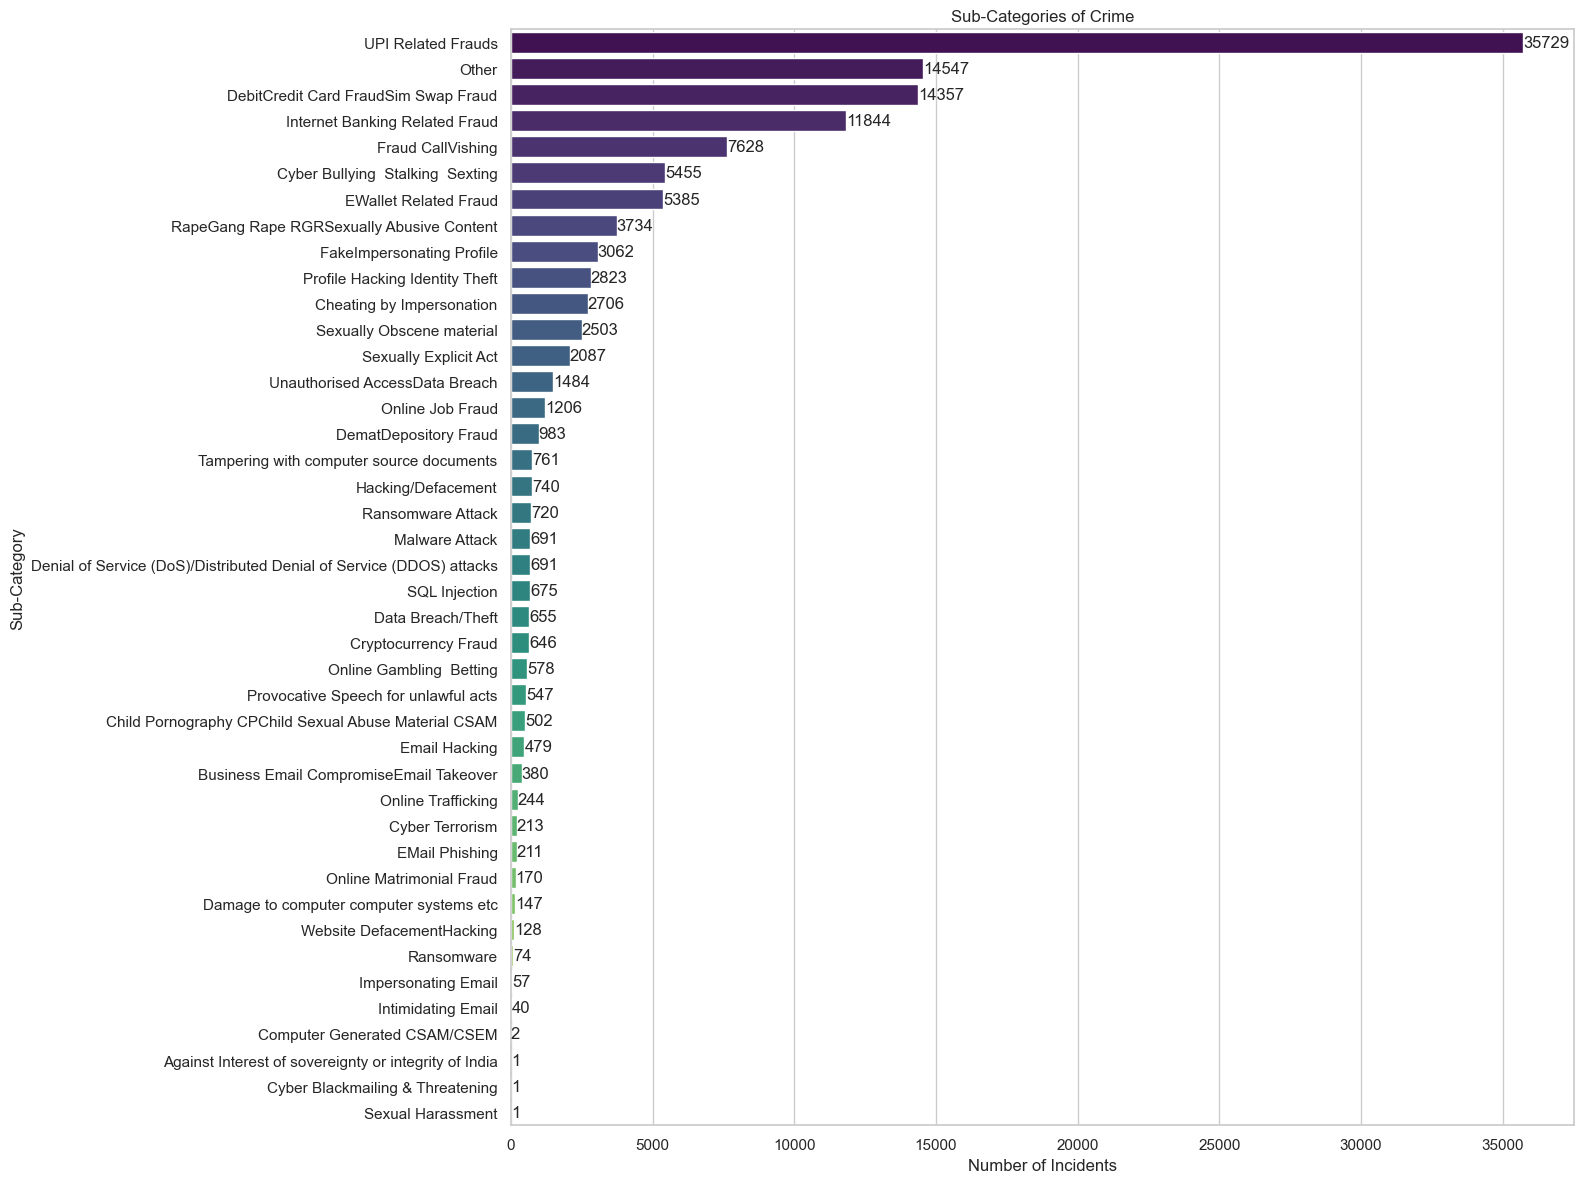

In [24]:
# Set visual theme
sns.set(style="whitegrid")

# 1. Distribution of Main Crime Categories

# Function to add value labels on bars
def add_value_labels(ax):
    for p in ax.patches:
        ax.annotate(f'{p.get_width():.0f}', 
                    (p.get_width(), p.get_y() + p.get_height() / 2), 
                    ha='left', va='center')
        
plt.figure(figsize=(10, 6))        
category_counts = data['category'].value_counts()
ax = sns.barplot(y=category_counts.index, x=category_counts.values, palette="viridis")
add_value_labels(ax)
plt.title("Distribution of Main Crime Categories")
plt.xlabel("Number of Incidents")
plt.ylabel("Crime Category")
plt.tight_layout()
plt.show()


# 2. Distribution of Sub-Categories 
plt.figure(figsize=(16, 12))
sub_category_counts = data['sub_category'].value_counts()
ax = sns.barplot(y=sub_category_counts.index, x=sub_category_counts.values, palette="viridis")
add_value_labels(ax)
plt.title("Sub-Categories of Crime")
plt.xlabel("Number of Incidents")
plt.ylabel("Sub-Category")
plt.tight_layout()
plt.show()


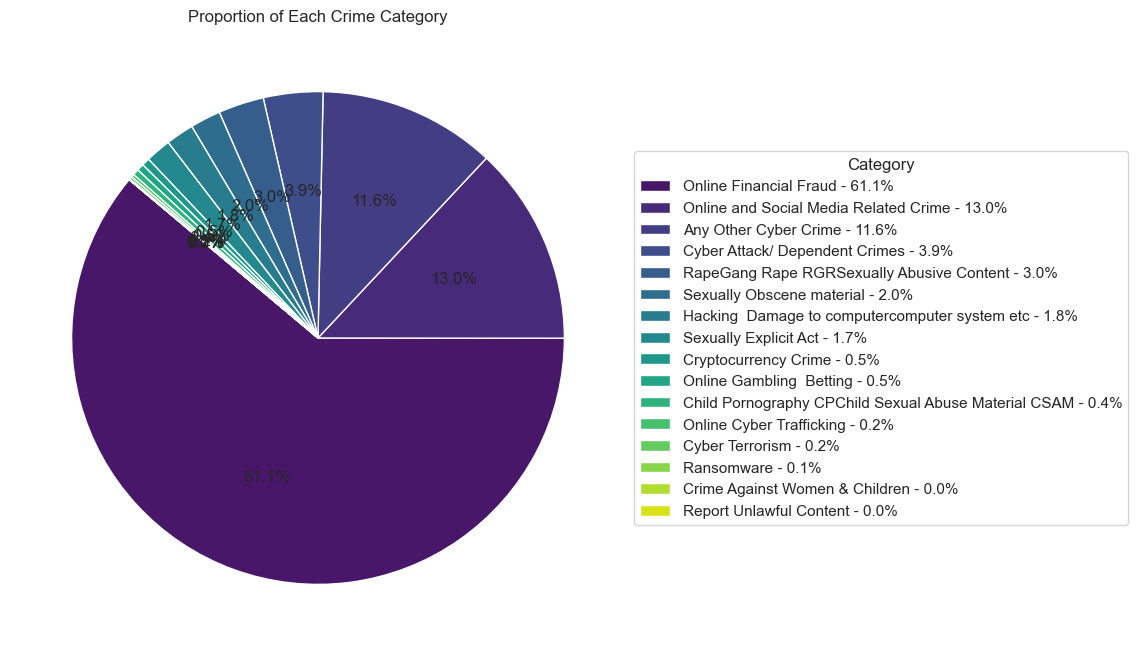

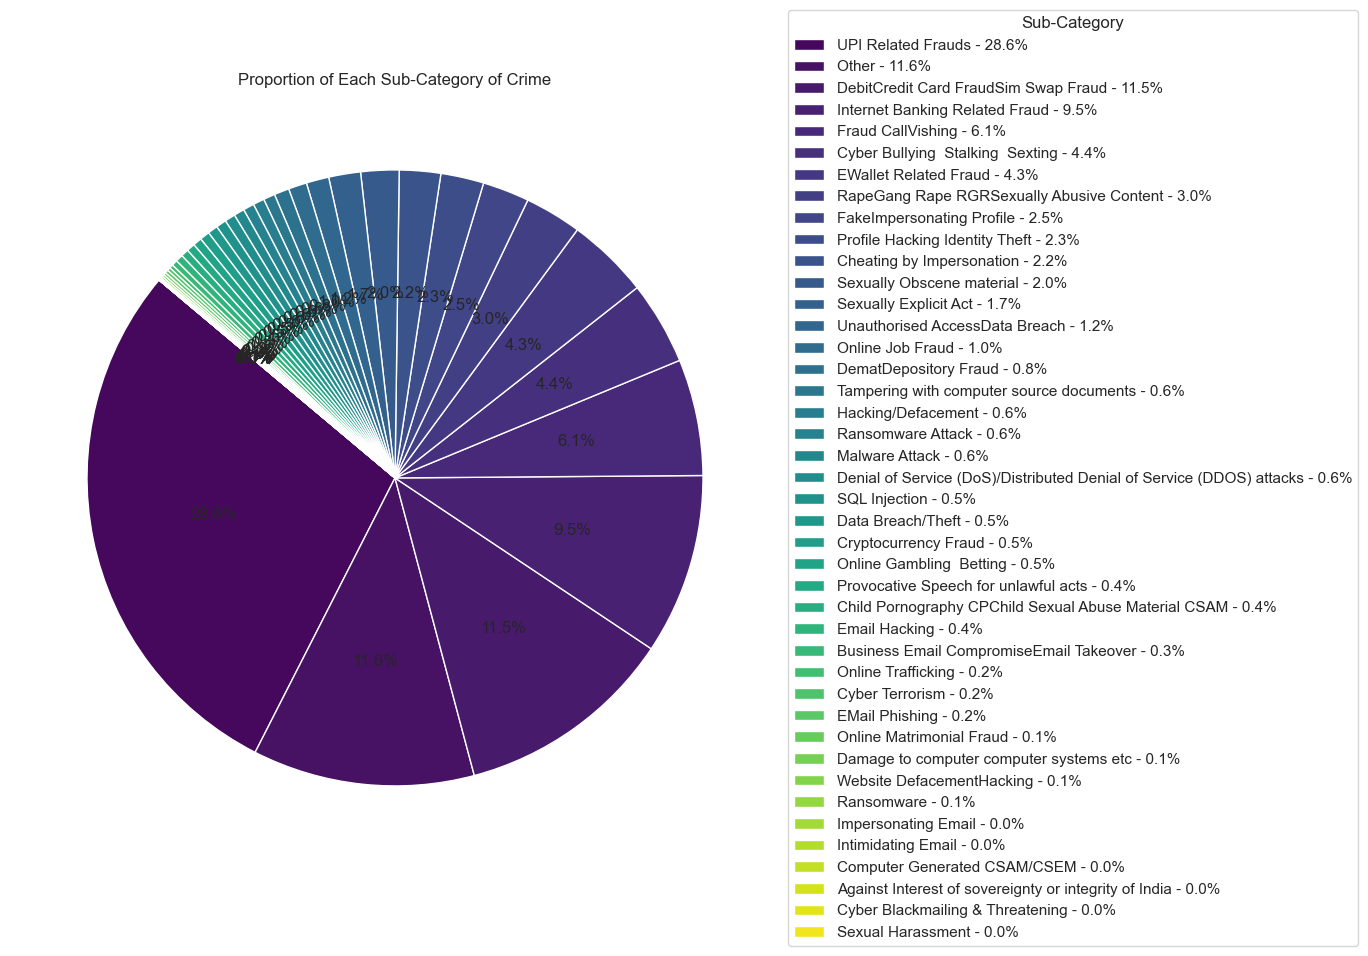

In [17]:
# 1. Pie Chart for Category with Legend including Percentages
plt.figure(figsize=(8, 8))
category_counts = data['category'].value_counts()
category_percentages = (category_counts / category_counts.sum()) * 100
legend_labels = [f'{label} - {percentage:.1f}%' for label, percentage in zip(category_counts.index, category_percentages)]
wedges, texts, autotexts = plt.pie(
    category_counts, 
    labels=None,  # Remove default labels for clarity
    autopct='%1.1f%%', 
    startangle=140, 
    colors=sns.color_palette("viridis", len(category_counts))
)
plt.legend(wedges, legend_labels, title="Category", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("Proportion of Each Crime Category")
plt.show()

# 2. Pie Chart for Sub-Category with Legend including Percentages
plt.figure(figsize=(10, 10))
sub_category_counts = data['sub_category'].value_counts()
sub_category_percentages = (sub_category_counts / sub_category_counts.sum()) * 100
legend_labels = [f'{label} - {percentage:.1f}%' for label, percentage in zip(sub_category_counts.index, sub_category_percentages)]
wedges, texts, autotexts = plt.pie(
    sub_category_counts, 
    labels=None,  # Remove default labels for clarity
    autopct='%1.1f%%', 
    startangle=140, 
    colors=sns.color_palette("viridis", len(sub_category_counts))
)
plt.legend(wedges, legend_labels, title="Sub-Category", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("Proportion of Each Sub-Category of Crime")
plt.show()

In [18]:
data.groupby(['category','sub_category']).count()

Unnamed: 0.1  \
category                                           sub_category                                                       
Any Other Cyber Crime                              Other                                                      14547   
Child Pornography CPChild Sexual Abuse Material... Child Pornography CPChild Sexual Abuse Material...           502   
Crime Against Women & Children                     Computer Generated CSAM/CSEM                                   2   
                                                   Cyber Blackmailing & Threatening                               1   
                                                   Sexual Harassment                                              1   
Cryptocurrency Crime                               Cryptocurrency Fraud                                         646   
Cyber Attack/ Dependent Crimes                     Data Breach/Theft                                            655   
                                                   Denial of Service (DoS)/Distributed Denial of S...           691   
                                                   Hacking/Defacement                                           740   
                                                   Malware Attack                                               691   
                                                   Ransomware Attack                                            720   
                                                   SQL Injection                                                675   
                                                   Tampering with computer source documents                     697   
Cyber Terrorism                                    Cyber Terrorism                                              213   
Hacking  Damage to computercomputer system etc     Damage to computer computer systems etc                      147   
                                                   Email Hacking                                                479   
                                                   Tampering with computer source documents                      64   
                                                   Unauthorised AccessData Breach                              1484   
                                                   Website DefacementHacking                                    128   
Online Cyber Trafficking                           Online Trafficking                                           244   
Online Financial Fraud                             Business Email CompromiseEmail Takeover                      380   
                                                   DebitCredit Card FraudSim Swap Fraud                       14357   
                                                   DematDepository Fraud                                        983   
                                                   EWallet Related Fraud                                       5385   
                                                   Fraud CallVishing                                           7628   
                                                   Internet Banking Related Fraud                             11844   
                                                   UPI Related Frauds                                         35729   
Online Gambling  Betting                           Online Gambling  Betting                                     578   
Online and Social Media Related Crime              Cheating by Impersonation                                   2706   
                                                   Cyber Bullying  Stalking  Sexting                           5455   
                                                   EMail Phishing                                               211   
                                                   FakeImpersonating Profile                                   3062   
                                                   Impers

In [20]:
import pandas as pd
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chand\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
# Load dataset (assuming it's already loaded as data0)
data0 = data.copy()

In [22]:
# Step 1: Text Cleaning Function
def preprocess_text(text):
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize
    tokens = text.split()
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

# Apply text cleaning to `crimeaditionalinfo` column
data0['cleaned_crimeinfo'] = data0['crimeaditionalinfo'].fillna('').apply(preprocess_text)

# Step 2: Common Keywords by Category
# Flatten tokens by category
category_keywords = data0.groupby('category')['cleaned_crimeinfo'].apply(lambda x: [item for sublist in x for item in sublist])

# Find the most common keywords for each category
category_top_keywords = {}
for category, words in category_keywords.items():
    counter = Counter(words)
    most_common = counter.most_common(20)  # Top 10 keywords
    category_top_keywords[category] = most_common

# Display top keywords for each category
for category, keywords in category_top_keywords.items():
    print(f"Category: {category}")
    print("Top Keywords:", keywords)
    print("\n")


Category: Any Other Cyber Crime
Top Keywords: [('call', 11020), ('number', 9328), ('pay', 7919), ('loan', 7113), ('money', 7018), ('account', 6820), ('get', 6155), ('amount', 6066), ('r', 4996), ('please', 4943), ('contact', 4939), ('take', 4921), ('ask', 4894), ('say', 4734), ('bank', 4484), ('send', 4407), ('sir', 4147), ('phone', 4025), ('help', 4015), ('app', 3901)]


Category: Child Pornography CPChild Sexual Abuse Material CSAM
Top Keywords: [('please', 409), ('call', 311), ('help', 232), ('video', 220), ('take', 218), ('sir', 210), ('action', 163), ('photo', 163), ('ask', 154), ('number', 151), ('name', 147), ('account', 147), ('hai', 146), ('send', 141), ('already', 131), ('whatsapp', 125), ('time', 124), ('girl', 116), ('id', 112), ('ki', 111)]


Category: Crime Against Women & Children
Top Keywords: [('even', 11), ('everything', 9), ('get', 8), ('like', 7), ('account', 7), ('look', 6), ('one', 6), ('email', 6), ('anymore', 5), ('think', 4), ('fix', 4), ('problem', 4), ('come'